# Proyecto 1: SentimentAPI — Análisis de Sentimientos de Feedbacks

##### Este proyecto implica trabajar con un conjunto de datos de respuestas a encuestas de satisfacción de clientes bancarios. El objetivo general es predecir el sentimiento en una serie de comentarios hechos por clientes y saber el sentimiento de estos, es decir, predecir si el comentarios es positivo, negativo o neutro.

Todo esto para dar una respuesta mas rapida y eficaz a todos lo malos comentarios y asi poder medir la satisfacción a lo largo del tiempo.



## Información de los Dataset:

#### Para el primer grupo de datos ("bank-comments.csv" y "bank-tabular.csv"), el conjunto de datos consta de dos representaciones diferentes para el mismo grupo de clientes:

1. Datos tabulares (bank-tabular.csv), que contienen información demográfica de cada cliente y puntuaciones (1-5) relacionadas con diferentes aspectos de su banco. Una variable "satisfied", etiquetada manualmente, indica si un cliente está "satisfecho" o "insatisfecho" con el banco.

2. Datos de texto (bank-comments.csv), que contienen breves comentarios textuales que indican las opiniones de los clientes sobre el banco.

Para este primer grupo se hara una limpieza y análisis de la información para extraer solo los datos mas significativos y de mas importancia para nosotros.

El segundo grupo consta de los datasets ("df_finalPNN.csv" y "datos_bancarios_pnn").

"df_finalPNN" es creado apartir del primer grupo de datos, ya que debido a que este no contaba con datos neutros, se tuvo que hacer un etiquetado manual despues de que se extrajo la información deseada del primer grupo de datasets.

"datos_bancarios_pnn" es un dataset sintético , creado para dotar de mas información a nuestro modelo de Machine Learning.


## Info de las columnas:



#### El archivo bank-tabular.csv es un archivo de texto separado por tabulaciones que contiene los siguientes campos:

- customer_id: Identificador único de cada cliente.
- date: Fecha de realización de la encuesta.
- customer_gender: Género del cliente.
- customer_age: Edad del cliente.
- customer_location: Ubicación del cliente en Irlanda.
- customer_type: Tipo de cliente.
- has_cc: Indica si el cliente tiene tarjeta de crédito con el banco.
- has_mortgage: Indica si el cliente tiene hipoteca con el banco.
- convenience: Puntuación (1-5) del cliente sobre la disponibilidad y accesibilidad del banco. Los clientes desean que su banco sea fácilmente accesible a través de múltiples canales, como sucursales y cajeros automáticos.
- customer_service: Puntuación (1-5) del servicio al cliente, que incluye el tiempo de respuesta, la amabilidad y la competencia del personal del banco. - banca_en_línea: Puntuación (1-5) para la facilidad de uso, funcionalidad y disponibilidad de los servicios de banca en línea.
- tasas_de_interés: Puntuación (1-5) para que los clientes estén más satisfechos con su banco si ofrece tasas de interés competitivas en ahorros e hipotecas.
- cargos_de_comisiones: Puntuación (1-5) para que los clientes estén más insatisfechos cuando se les cobran comisiones por servicios inesperados o cuando estas son elevadas.
- participación_comunitaria: Puntuación (1-5) para que los clientes tengan una opinión más favorable de su banco si participan en la comunidad local y apoyan causas benéficas.
- servicios_de_productos: Puntuación (1-5) relacionada con la calidad y variedad de los productos y servicios que ofrece el banco.
- seguridad_de_privacidad: Puntuación (1-5) para que los clientes consideren que su banco ofrece altos niveles de seguridad y privacidad, y gestiona sus datos personales con cuidado. - reputación: Una puntuación (1-5) que indica si los clientes creen que su banco tiene una buena reputación en cuanto a fiabilidad y prácticas éticas.
- satisfecho: Un valor booleano asignado manualmente que indica si un cliente está satisfecho en general con su banco.

El archivo bank-comments.csv es un archivo de texto separado por tabulaciones que contiene los siguientes campos:

- customer_id: Un identificador único para cada cliente.
- fecha: La fecha en que se realizó la encuesta.
- comentarios: Los comentarios breves de los clientes sobre su banco.

## Herramientas utilizadas

#### En este proyecto hemos utilizado:

-Notebooks: Enternos de trabajo listos con python instaldos para trabajar efizcamente con temas con Data Science. En este proyecto estamos utilizando Google Colaboratory.

-Librerias: Utilizamos librerias hechas para DataScience como lo pueden ser Pandas, Numpy, Matplotlib, Deep Translator, Scikit-learn etc.

-Github: Herremienta que sirve como control de versiones de nuestro proyecto ademas de ayuda al trabajo en equipo.


## Preparación y limpieza de datos:

In [ ]:
#Importamos las librerias a utilizar.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import unicodedata

# 1. EDA.

In [ ]:
#Lectura de archivos y creación de dataframes.


#Asignación de variables a todos nuestros datasets extraidos de un repositorio de github.

url_bankTabular = 'https://raw.githubusercontent.com/CarlitoUwU/Hackathon-ONE-II---Latam_DS/refs/heads/main/data/raw/bank-tabular.csv'
url_bankComments = 'https://raw.githubusercontent.com/CarlitoUwU/Hackathon-ONE-II---Latam_DS/refs/heads/main/data/raw/bank-comments.csv'
url_data_sintetica = 'https://raw.githubusercontent.com/CarlitoUwU/Hackathon-ONE-II---Latam_DS/refs/heads/main/data/raw/datos_bancarios_pnn.csv'
url_data_pnn = 'https://raw.githubusercontent.com/CarlitoUwU/Hackathon-ONE-II---Latam_DS/refs/heads/main/data/raw/df_finalPNN.csv'

#Leemos nuestro primer grupo de datos que consta de 2 datasets y los unimos para formar uno solo dataframe.

df_bank_tabular = pd.read_csv(url_bankTabular, sep='\t')
df_bank_comments = pd.read_csv(url_bankComments, sep='\t')

df = pd.concat([df_bank_tabular, df_bank_comments], axis=1)

print(df)

#Y observamos que contamos con un total de 3000 filas y 21 columnas.

      customer_id        date customer_gender  customer_age customer_location  \
0          216604  2022-08-22            Male          50.0           Munster   
1          259276  2022-11-23          Female          61.0          Leinster   
2          265459  2022-01-21          Female          63.0           Munster   
3           58770  2022-03-13               f           NaN          Leinster   
4          318031  2022-08-08          Female          41.0          Leinster   
...           ...         ...             ...           ...               ...   
2995       322582  2021-09-23            Male          41.0           Munster   
2996        53418  2021-03-07               f          57.0           Munster   
2997        79364  2021-08-01               m           NaN           Munster   
2998       371134  2021-06-25               m          42.0          Leinster   
2999       109281  2022-10-04            Male          42.0               NaN   

     customer_type  has_cc 

In [ ]:
columnas = df.info()
print(columnas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            3000 non-null   int64  
 1   date                   3000 non-null   object 
 2   customer_gender        2688 non-null   object 
 3   customer_age           2530 non-null   float64
 4   customer_location      2635 non-null   object 
 5   customer_type          3000 non-null   object 
 6   has_cc                 3000 non-null   bool   
 7   has_mortgage           3000 non-null   bool   
 8   convenience            2936 non-null   float64
 9   customer_service       2971 non-null   float64
 10  online_banking         2970 non-null   float64
 11  interest_rates         2835 non-null   float64
 12  fees_charges           2924 non-null   float64
 13  community_involvement  2700 non-null   float64
 14  products_services      2900 non-null   float64
 15  priv

In [ ]:
#Creación de un nuevo dataframe con las columnas mas importantes para nuestro modelo.

sub_df = df[['satisfied','comments']]
print(sub_df)

      satisfied                                           comments
0          True                 Overal, this bank is satisfactory.
1          True  Easy to find zhe bank ' s branches and ATMs. A...
2          True  Bank's phone app is really great. In general a...
3          True                                                NaN
4         False                                                NaN
...         ...                                                ...
2995      False                                         No comment
2996       True                      Online banking is really good
2997      False  customer service quality from this bank is ter...
2998       True  Great to see that my bank supports local sport...
2999       True  The bank ' a online platform is really impress...

[3000 rows x 2 columns]


In [ ]:
#Buscamos cuantos datos faltantes tenemos.

datos_faltantes_por_columnas = sub_df.isna().sum()
print(datos_faltantes_por_columnas)

satisfied      0
comments     517
dtype: int64


In [ ]:
#Eliminamos las filas con todos los datos faltantes y lo asignamos a una nueva variable.

df_final1 = sub_df.dropna()
print(df_final1)

#Observamos que nos quedamos con un total de 2483 filas y 2 columnas.

      satisfied                                           comments
0          True                 Overal, this bank is satisfactory.
1          True  Easy to find zhe bank ' s branches and ATMs. A...
2          True  Bank's phone app is really great. In general a...
6         False   Seriously considerin switching to a rival bank..
8          True  i guess that my bank is committed to sustainab...
...         ...                                                ...
2995      False                                         No comment
2996       True                      Online banking is really good
2997      False  customer service quality from this bank is ter...
2998       True  Great to see that my bank supports local sport...
2999       True  The bank ' a online platform is really impress...

[2483 rows x 2 columns]


In [ ]:
#Se puede observa que de momento en nuestro dataset no hay datos neutros.

df_final1['satisfied'].value_counts()

,count
satisfied,
False,1431
True,1052


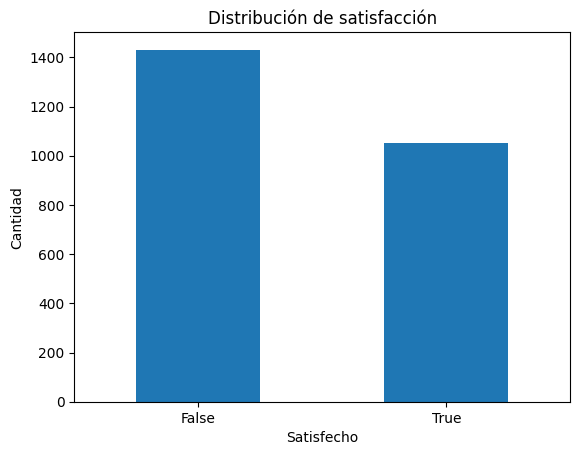

In [ ]:
#Gráfica de nuestra columna satisfied para conocer la proporción que tenemos con 2 sentimientos.

counts = df_final1['satisfied'].value_counts()

counts.plot(kind='bar')
plt.title('Distribución de satisfacción')
plt.xlabel('Satisfecho')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Como nuestro primer grupo de datos esta en ingles vamos a tratar la columna "comments" para traducirlos todos.

df_final1['comments']

,comments
0,"Overal, this bank is satisfactory."
1,Easy to find zhe bank ' s branches and ATMs. A...
2,Bank's phone app is really great. In general a...
6,Seriously considerin switching to a rival bank..
8,i guess that my bank is committed to sustainab...
...,...
2995,No comment
2996,Online banking is really good
2997,customer service quality from this bank is ter...
2998,Great to see that my bank supports local sport...


In [ ]:
#Instalamos el traductor

!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
#Importamos y aplicamos una función para traducir cada una de las filas de la columna "comments" y aplicarlos en una
#nueva columna "comments_es"

from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='en', target='es')

df_final1['comments_es'] = df_final1['comments'].apply(
    lambda x: translator.translate(x) if isinstance(x, str) and x.strip() != "" else x
)

/tmp/ipython-input-185212034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final1['comments_es'] = df_final1['comments'].apply(


In [ ]:
#Agregamos a la variable df_final1 las columnas "satisfied" y "comments_es" que contiene los comentarios ya traducidos.

df_final1[['satisfied','comments_es']]

#Se puede obervar que nos quedamos con 2483 comentarios ya traducidos.


,satisfied,comments_es
0,True,"En general, este banco es satisfactorio."
1,True,Fácil de encontrar sucursales y cajeros automá...
2,True,La aplicación de teléfono del banco es realmen...
6,False,Considere seriamente cambiarse a un banco rival.
8,True,Supongo que mi banco está comprometido con la ...
...,...,...
2995,False,Sin comentarios
2996,True,La banca en línea es realmente buena.
2997,False,La calidad del servicio al cliente de este ban...
2998,True,Es fantástico ver que mi banco apoya a los equ...


In [ ]:
#Hasta este punto ya tenemos guardadas en una variable las columnas de mas importancia y ya traducidas, pero aun falta
#normalizar los textos.
print(df_final1['comments_es'].iloc[20])

Debe priorizar la privacidad de los datos para sus clientes. ...


In [ ]:
#Creamos una función para limpiar y normalizar todos los comentarios.

def limpiar_texto(texto: str) -> str:
    # Pasar a minúsculas
    texto = texto.lower()

    # Normalizar y quitar acentos
    texto = unicodedata.normalize('NFD', texto)
    texto = texto.encode('ascii', 'ignore').decode('utf-8')

    # Quitar todo lo que no sean letras o espacios
    texto = re.sub(r'[^a-z\s]', '', texto)

    # Quitar espacios extra
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

In [ ]:
#Aplicamos la función a la columna "comments_es"
df_final1['comments_es'] = df_final1['comments_es'].apply(limpiar_texto)
df_final1['comments_es']

/tmp/ipython-input-1386815807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final1['comments_es'] = df_final1['comments_es'].apply(limpiar_texto)


,comments_es
0,en general este banco es satisfactorio
1,facil de encontrar sucursales y cajeros automa...
2,la aplicacion de telefono del banco es realmen...
6,considere seriamente cambiarse a un banco rival
8,supongo que mi banco esta comprometido con la ...
...,...
2995,sin comentarios
2996,la banca en linea es realmente buena
2997,la calidad del servicio al cliente de este ban...
2998,es fantastico ver que mi banco apoya a los equ...


In [ ]:
#Observamos que ya tenemos toda nuestra columna "comments_es" normalizada y lista.
df_final1['comments_es'].iloc[20]

'debe priorizar la privacidad de los datos para sus clientes'

In [ ]:
#De momento ya esta el primer grupo de datos limpio, pero aún no contamos con comentarios etiquetados en "Neutro"
#Así que lo que haremos será descargar lo que hasta ahora tenemos listo que es nustra variable "df_final" y
#manualmente haremos ese etiquetado de neutro.
#Ademas que le agregaremos tambien otro dataset sintético que hemos creado, todo esto para tener mejor entrenado
#a nuestro modelo de Machine Learning.

df_final1 = df_final1[['comments_es','satisfied']]
df_final1.to_csv("df_final1.csv", index=False)

In [ ]:
#Una vez que hemos etiquetado manualmente los comentarios "Neutros" procedemos a cargar y unir en un dataframe
#los dos ultimos datasets.

data1 = pd.read_csv(url_data_pnn)
data2 = pd.read_csv(url_data_sintetica)

df_final = pd.concat([data1, data2], ignore_index=True)

print(f"Total de filas en el nuevo DataFrame: {len(df_final)}")
print(df_final.head())

#Observamos que ahora contamos con 5230 comentarios.

Total de filas en el nuevo DataFrame: 5230
                                         comments_es satisfied
0             en general este banco es satisfactorio  Positivo
1  facil de encontrar sucursales y cajeros automa...  Positivo
2  la aplicacion de telefono del banco es realmen...  Positivo
3    considere seriamente cambiarse a un banco rival  Negativo
4  supongo que mi banco esta comprometido con la ...  Positivo


In [ ]:
df_final['satisfied'].value_counts()

,count
satisfied,
Negativo,2547
Positivo,2406
Neutro,277


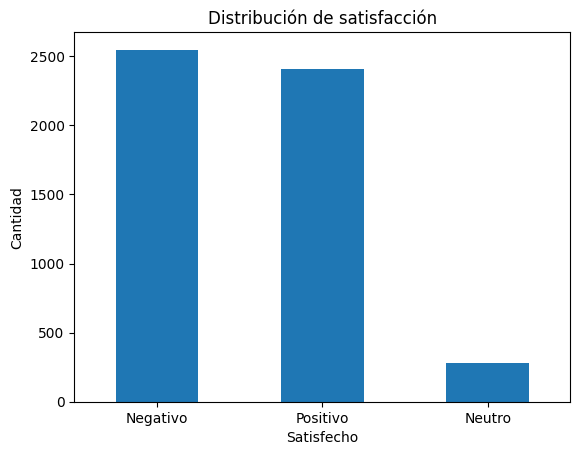

In [ ]:
#Gráfica de nuestra columna satisfied para conocer la proporción que tenemos con 3 sentimientos.

counts = df_final['satisfied'].value_counts()

counts.plot(kind='bar')
plt.title('Distribución de satisfacción')
plt.xlabel('Satisfecho')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Como hemos agregado nuevos datos hace falta limpiarlos nuevamente.

print(df_final['comments_es'].iloc[2500])

La gestión de mi hipoteca me parece muy mediocre y las comisiones son un robo.


In [ ]:
#Volvemos a usar la función "limpiar_texto" que creamos anteriormente.

df_final['comments_es'] = df_final['comments_es'].apply(limpiar_texto)
df_final['comments_es']

,comments_es
0,en general este banco es satisfactorio
1,facil de encontrar sucursales y cajeros automa...
2,la aplicacion de telefono del banco es realmen...
3,considere seriamente cambiarse a un banco rival
4,supongo que mi banco esta comprometido con la ...
...,...
5225,el servicio me encanto
5226,me encanta el servicio volveria solo por eso
5227,me gusta mucho volveria por eso
5228,su rapidez es muy buena volveria solo por eso


In [ ]:
#Comprobamos

print(df_final['comments_es'].iloc[2500])

la gestion de mi hipoteca me parece muy mediocre y las comisiones son un robo


In [ ]:
#Y ya tenemos limpia nuevamente toda nuestra data importante y la que usaremos para nuestro modelo.

df_final

,comments_es,satisfied
0,en general este banco es satisfactorio,Positivo
1,facil de encontrar sucursales y cajeros automa...,Positivo
2,la aplicacion de telefono del banco es realmen...,Positivo
3,considere seriamente cambiarse a un banco rival,Negativo
4,supongo que mi banco esta comprometido con la ...,Positivo
...,...,...
5225,el servicio me encanto,Positivo
5226,me encanta el servicio volveria solo por eso,Positivo
5227,me gusta mucho volveria por eso,Positivo
5228,su rapidez es muy buena volveria solo por eso,Positivo


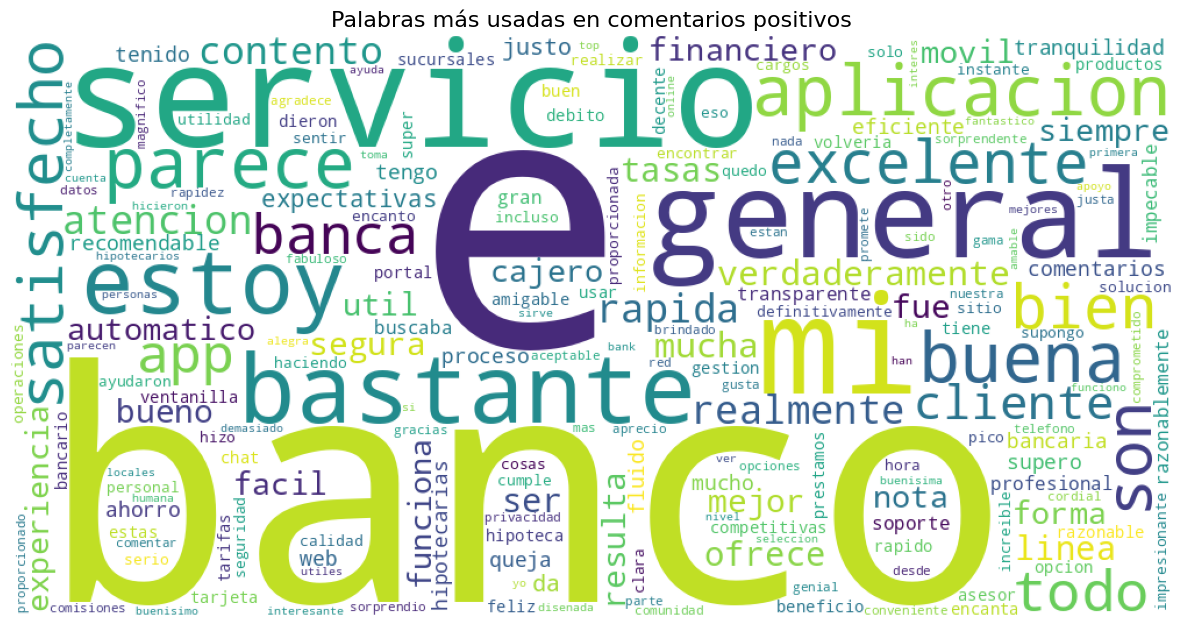

In [ ]:
#Hacemos el set de las "stopwords"
#Y hacemos tambien una nube de palabras, asi veremos cuales son las mas utilizadas en cada uno de los sentimientos.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Stopwords base + algunas en español
stopwords_es = set(STOPWORDS)
stopwords_extra = {
    'de','la','que','el','en','y','a','los','del','se','las','por','un',
    'para','con','una','su','al','lo','como','más','sus',
    'le','ya','o','este','sí','porque','esta','entre','cuando','muy',
    'sin','sobre','también','me','hasta','hay','donde','quien'
}

stopwords_es = stopwords_es.union(stopwords_extra)

# Filtrar comentarios positivos
positive_text = df_final[df_final['satisfied'] == 'Positivo']['comments_es']

# Unir todos los textos en un solo string
text = ' '.join(positive_text.dropna().astype(str))

# Generar wordcloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stopwords_es,
    collocations=False
).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Palabras más usadas en comentarios positivos", size=16)
plt.show()

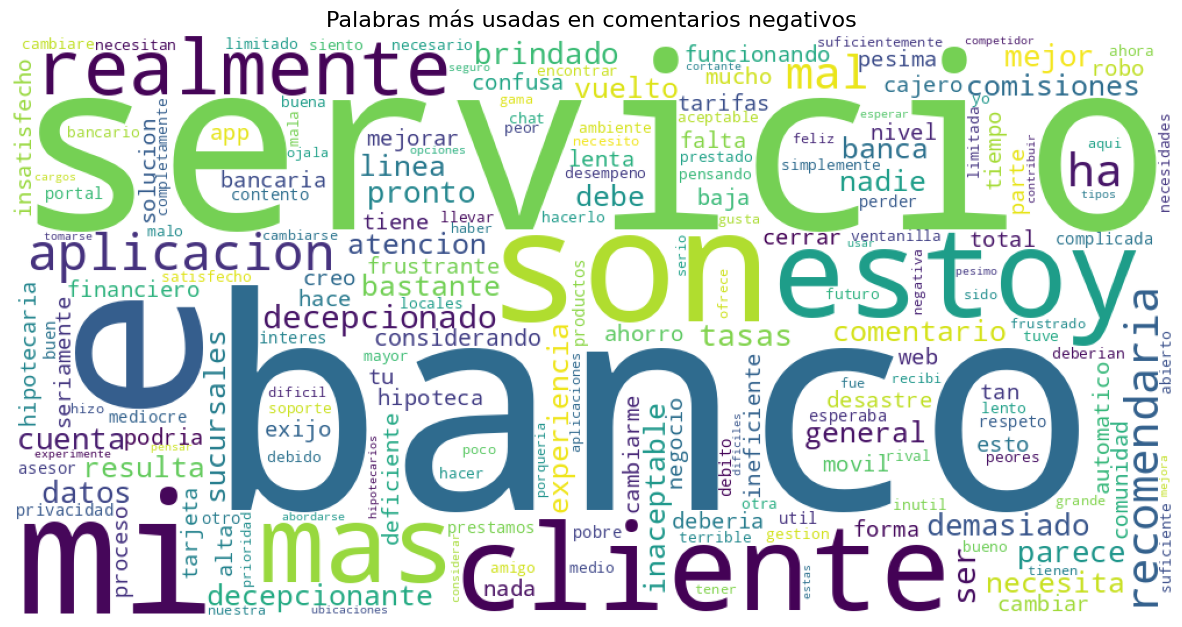

In [ ]:
# Filtrar comentarios negativos
negative_text = df_final[df_final['satisfied'] == 'Negativo']['comments_es']

# Unir todos los textos en un solo string
text = ' '.join(negative_text.dropna().astype(str))

# Generar wordcloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stopwords_es,
    collocations=False
).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Palabras más usadas en comentarios negativos", size=16)
plt.show()

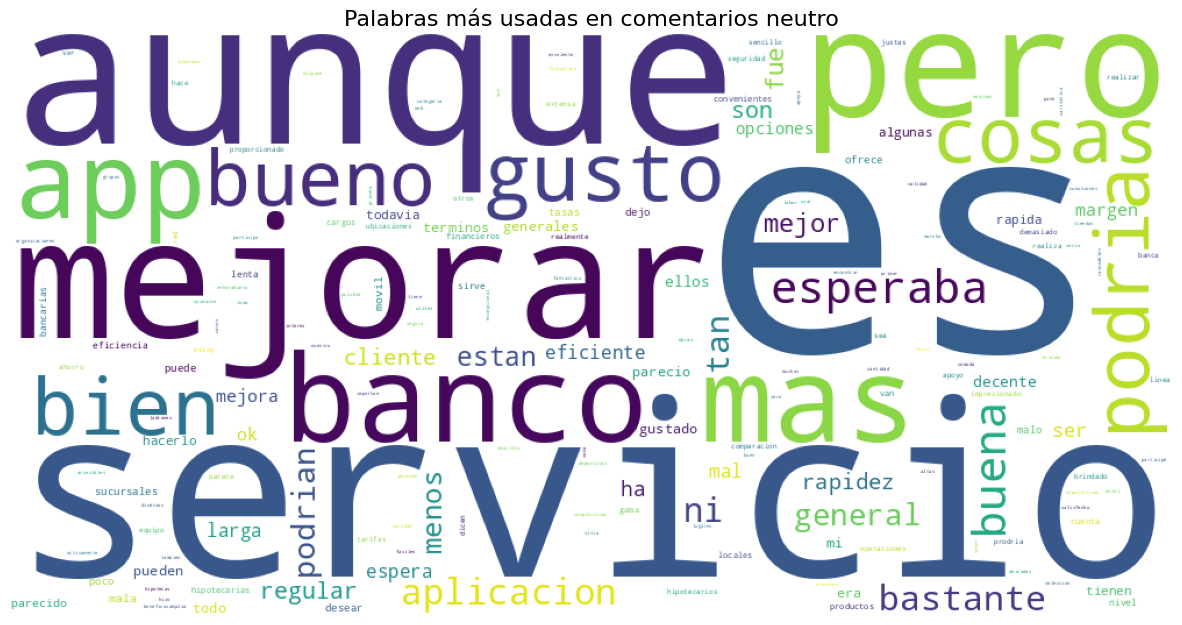

In [ ]:
# Filtrar comentarios neutros
negative_text = df_final[df_final['satisfied'] == 'Neutro']['comments_es']

# Unir todos los textos en un solo string
text = ' '.join(negative_text.dropna().astype(str))

# Generar wordcloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stopwords_es,
    collocations=False
).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Palabras más usadas en comentarios neutro", size=16)
plt.show()

# 2. Vectorización TF-IDF y Modelo Supervisado de Regresión Lógistica.

In [ ]:
#Ahora instalaremos la biblioteca scikit-learn

!pip install -U scikit-learn

In [ ]:
#Importamos la biblioteca y nos aseguramos de tener la ultima versión
import sklearn
print(f"Versión de scikit-learn: {sklearn.__version__}")

Versión de scikit-learn: 1.8.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib

In [ ]:
#Preparación de datos

X = df_final['comments_es']
y = df_final['satisfied']

In [ ]:
#Procedemos con el entrenamiento.
#Dividimos el conjunto de datos en 2 grupos:
#Uno para entrenar un modelo de aprendizaje automático (Machine Learning) y
#otro para probar su rendimiento.



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Agregamos a una variable las "stopwords" para agregarlas a un pipeline de python.

stopwords_modelo = list(stopwords_extra)
stopwords_modelo

['esta',
 'una',
 'del',
 'para',
 'me',
 'hasta',
 'por',
 'en',
 'y',
 'que',
 'entre',
 'como',
 'cuando',
 'más',
 'de',
 'la',
 'le',
 'sobre',
 'al',
 'a',
 'con',
 'lo',
 'sus',
 'quien',
 'sí',
 'muy',
 'este',
 'donde',
 'también',
 'el',
 'su',
 'las',
 'porque',
 'se',
 'un',
 'ya',
 'los',
 'sin',
 'hay',
 'o']

In [ ]:
# Creación del Pipeline para 3 clases

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words=stopwords_modelo,
        ngram_range=(1, 2),
        max_df=0.9,
        min_df=5
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        solver="lbfgs"
    ))
])

In [ ]:
# Entrenamiento

pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


# 3. Métricas de desempeño (Accuracy, Precision, Recall, F1-score)

In [ ]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negativo       0.96      0.99      0.97       509
      Neutro       0.98      1.00      0.99        56
    Positivo       0.99      0.95      0.97       481

    accuracy                           0.97      1046
   macro avg       0.98      0.98      0.98      1046
weighted avg       0.97      0.97      0.97      1046



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Accuracy no necesita 'average' porque es un cálculo global
acc = accuracy_score(y_test, y_pred)

# Para las demás, debemos especificar cómo promediar las 3 clases
# 'weighted' es el más recomendado porque considera el número de ejemplos de cada sentimiento
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)

Accuracy : 0.9732313575525813
Precision: 0.9737139869932628
Recall   : 0.9732313575525813
F1-score : 0.9732105182268684


## Interpretación de las métricas del modelo

El modelo basado en TF-IDF + Regresión Logística muestra un desempeño sólido en la tarea de clasificación de sentimiento:

### Accuracy = 0.97
El 97% de los comentarios fueron clasificados correctamente. Esto indica un alto rendimiento general del modelo.

### Precision (Positivo) = 0.99
Cuando el modelo predice que un comentario es positivo, acierta el 99% de las veces.
Esto significa que hay muy pocos falsos positivos, es decir, raramente se clasifica un comentario negativo como positivo.

### Recall (Positivo) = 0.95
El modelo identifica correctamente el 95% de los comentarios que realmente son positivos.
Existe un pequeño porcentaje de positivos que el modelo no logra detectar (falsos negativos).

### F1-score = 0.97
Es un equilibrio entre precisión y recall. Un valor cercano a 1 indica que el modelo mantiene un buen balance entre ambos.

## Análisis por clase

### Clase Negativo

- Precision: 0.96
- Recall: 0.99

El modelo detecta casi todos los comentarios negativos, lo cual es muy valioso para el caso de uso de atención al cliente, ya que permite identificar la mayoría de las quejas reales.

### Clase Positivo

- Precision: 0.99
- Recall: 0.95

El modelo es muy confiable cuando predice comentarios positivos, aunque deja escapar algunos que realmente lo son.

### Clase Neutro

- Precision: 0.98
- Recall: 1.00

El modelo es mas preciso a la hora de comentarios neutros.

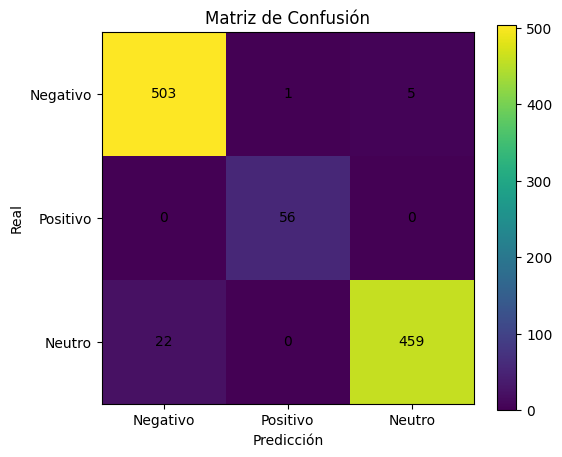

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Matriz de Confusión")
plt.colorbar()

classes = ["Negativo", "Positivo", "Neutro"]
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)

plt.xlabel("Predicción")
plt.ylabel("Real")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

## Interpretación de la matriz de confusión

La matriz de confusión permite analizar en detalle cómo el modelo clasifica los comentarios positivos, negativos y neutros identificando aciertos y errores.

- **Verdaderos Negativos (503):**
Comentarios negativos correctamente clasificados como negativos.
El modelo identifica casi todas las quejas reales de los clientes.

- **Falsos Positivos (56):**
Comentarios negativos que el modelo clasificó incorrectamente como positivos.
Este número es muy bajo, lo que significa que rara vez se ignoran quejas pensando que son elogios.

- **Verdaderos Positivos (56):**
Comentarios positivos correctamente clasificados como positivos.
La mayoría de los elogios y comentarios favorables son detectados correctamente.

- **Falsos Negativos (22):**
Comentarios positivos que el modelo clasificó como negativos.
Representan el principal tipo de error del modelo, aunque su impacto es menor en el contexto del negocio.

- **Verdaderos Neutros (459):**
Comentarios neutros correctamente clasificados como neutros.

- **Falsos Neutros (5):**

## Análisis desde la perspectiva del negocio

En un escenario de atención al cliente, es más crítico identificar correctamente los comentarios negativos, ya que estos suelen requerir una respuesta inmediata.

El modelo logra detectar 503 comentarios negativos, alcanzando un recall del 99% para la clase negativa.

Los falsos positivos son mínimos, lo que reduce el riesgo de priorizar comentarios que no son realmente problemáticos.

Aunque existen algunos falsos negativos (comentarios positivos mal clasificados), este tipo de error tiene menor impacto operativo.



In [ ]:
#input
texto = "La aplicación es muy buena."

input_modelo = [limpiar_texto(texto)]

pred = pipeline.predict(input_modelo)[0]
proba = pipeline.predict_proba(input_modelo).max()

print(input_modelo)
print(pred, proba)

['la aplicacion es muy buena']
Positivo 0.8151837397694819


#4. Serialización del modelo (joblib/pickle).

In [ ]:
#Importamos la biblioteca Joblib que nos servirá para guardar nuestro modelo.

import joblib

joblib.dump(pipeline, "sentiment_pipeline_pnn.pkl")

['sentiment_pipeline_pnn.pkl']

In [ ]:
#Guardamos nuestro modelo en una variable.

pipeline_load = joblib.load("/content/sentiment_pipeline_pnn.pkl")

In [ ]:
texto = "La aplicación es muy buena."

input_modelo = [limpiar_texto(texto)]

pred = pipeline_load.predict(input_modelo)[0]
proba = pipeline_load.predict_proba(input_modelo).max()

print(input_modelo)
print(pred, proba)

['la aplicacion es muy buena']
Positivo 0.8151837397694819


In [ ]:
#Creamos una función donde cargaremos nuestro modelos y nos ayudará a predecir el sentimiento
#de cualquier comentario.

def predecir_sentimiento(textos, pipeline, limpiar_fn=None):
    """
    Acepta un string o una lista de strings y devuelve:
    - si es string: (pred, proba)
    - si es lista: [(pred, proba), ...]
    """
    # Detectar si es un solo texto
    es_string = isinstance(textos, str)

    # Convertir a lista si es necesario
    if es_string:
        textos = [textos]

    # Limpiar textos si se pasa función
    if limpiar_fn is not None:
        textos_proc = [limpiar_fn(t) for t in textos]
    else:
        textos_proc = textos

    # Predicciones
    preds = pipeline.predict(textos_proc)
    probas = pipeline.predict_proba(textos_proc).max(axis=1)

    resultados = list(zip(preds, probas))

    # Devolver formato según input
    return resultados[0] if es_string else resultados

In [ ]:
texto = "La aplicación es muy buena."

pred, proba = predecir_sentimiento(texto, pipeline_load, limpiar_texto)

print(pred, proba)

Positivo 0.8151837397694819


In [ ]:
#Podemos observar como escribimos cualquier comentario y nos hace la clasificación de sentimientos correctamente.

textos = [
    "La aplicación es muy buena.",
    "El servicio es pésimo y lento.",
    "No está mal, pero podría ser mejor.",
    "Porqueria de app.",
    "es la mejor aplicacion del mundo me encanta",
    "Muy buena",
    "La app es lenta",
    "Me encanto el servicio que ofrece la app",
    "No me parece buena",
    "Buen servicio",
    "La aplicación es buena pero podria mejorar",
    "Atención muy amable, incluso en hora pico.",
    "El servicio fue rapido y el personal muy cordial",
    "Me dieron factura electronica al instante",
    "Buen servicio pero falta estacionamiento",
    "El precio esta ok, pero podrian mejorar la prestacion",
    "Me solucionaron el problema pero tardaron varios dias",
    "Me gusto aunque esperaba mas opciones",
    "Responden rapido y cumplen lo que prometen",
    "No hay un buen servicio",
    "El servicio fue bueno, aunque la espera fue un poco larga.",
    "¡Súper recomendado! Calidad top y precios justos.",
    "Tuve un problema y lo solucionaron rápido por WhatsApp.",
    "Me cobraron de más y tuve que reclamar. Al final lo corrigieron.",
    "Me sorprendió la calidad, definitivamente repetiré.",
    "Tuve que esperar 40 minutos, deberían organizar mejor la fila.",
    "Se equivocaron en mi nombre en la factura.",
    "Me dieron una solución alternativa y funcionó perfecto.",
    "El servicio al cliente es lento por correo, mejor por chat.",
    "El servicio estaba buenisimo",
    "Me hicieron sentir bienvenido desde que entré.",
    "La atención telefónica fue cortante.",
    "Me ayudaron con la configuración y quedó listo",
    "La página se cae a veces, ojalá lo arreglen pronto.",
    "Me dieron información clara y sin tecnicismos.",
    "Me dieron una atención súper humana, se agradece.",
    "Me encantó el servicio, volvería solo por eso"


]

resultados = predecir_sentimiento(textos, pipeline_load, limpiar_texto)

for t, (pred, proba) in zip(textos, resultados):
    print(t, "->", pred, proba)

La aplicación es muy buena. -> Positivo 0.8151837397694819
El servicio es pésimo y lento. -> Negativo 0.8935415639245711
No está mal, pero podría ser mejor. -> Neutro 0.9756456600417334
Porqueria de app. -> Negativo 0.8089435803635247
es la mejor aplicacion del mundo me encanta -> Positivo 0.9070648266117043
Muy buena -> Positivo 0.9284671413914882
La app es lenta -> Negativo 0.5828623301916348
Me encanto el servicio que ofrece la app -> Positivo 0.8910744782520917
No me parece buena -> Negativo 0.8026200858704077
Buen servicio -> Positivo 0.6446340568672977
La aplicación es buena pero podria mejorar -> Neutro 0.9853521233060839
Atención muy amable, incluso en hora pico. -> Positivo 0.8816618562675806
El servicio fue rapido y el personal muy cordial -> Positivo 0.8415157385141863
Me dieron factura electronica al instante -> Positivo 0.8622616109187455
Buen servicio pero falta estacionamiento -> Negativo 0.4423556676342076
El precio esta ok, pero podrian mejorar la prestacion -> Neutro 